# Q8

In [37]:
# Required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
auto=pd.read_csv("Auto.csv",na_values="?")
auto=auto.dropna()
auto.head()
datareq= {
          'horsepower':auto['horsepower'] ,
           'target' :auto['mpg']
}
df=pd.DataFrame(datareq,columns=['horsepower','target'])
X=df['horsepower']
Y=df['target']
X1=sm.add_constant(X)
model=sm.OLS(Y,X1).fit()
predictions=model.predict()
print(model.summary())    
print("Confidence intervals")
print(model.conf_int())
print()

print("Prediction intervals")
predint =model.get_prediction(X1)
print(predint.summary_frame())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        17:03:13   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

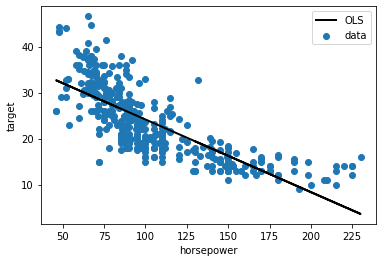

In [5]:
plt.scatter(X,Y,label="data")
plt.plot(X,predictions,color='black',linewidth=2,label="OLS")
plt.ylabel('target')
plt.xlabel('horsepower')
plt.legend()
plt.show()





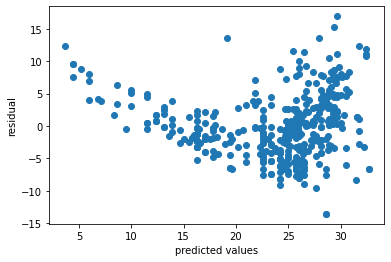

In [39]:
# Diagnostic plot of fitted vs residual values

plt.scatter(predictions,Y-predictions,label="data")
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.show()

#                                 Q9


In [40]:
auto1=auto.drop('name',axis=1)

In [9]:
# COrrelation matrix
auto1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


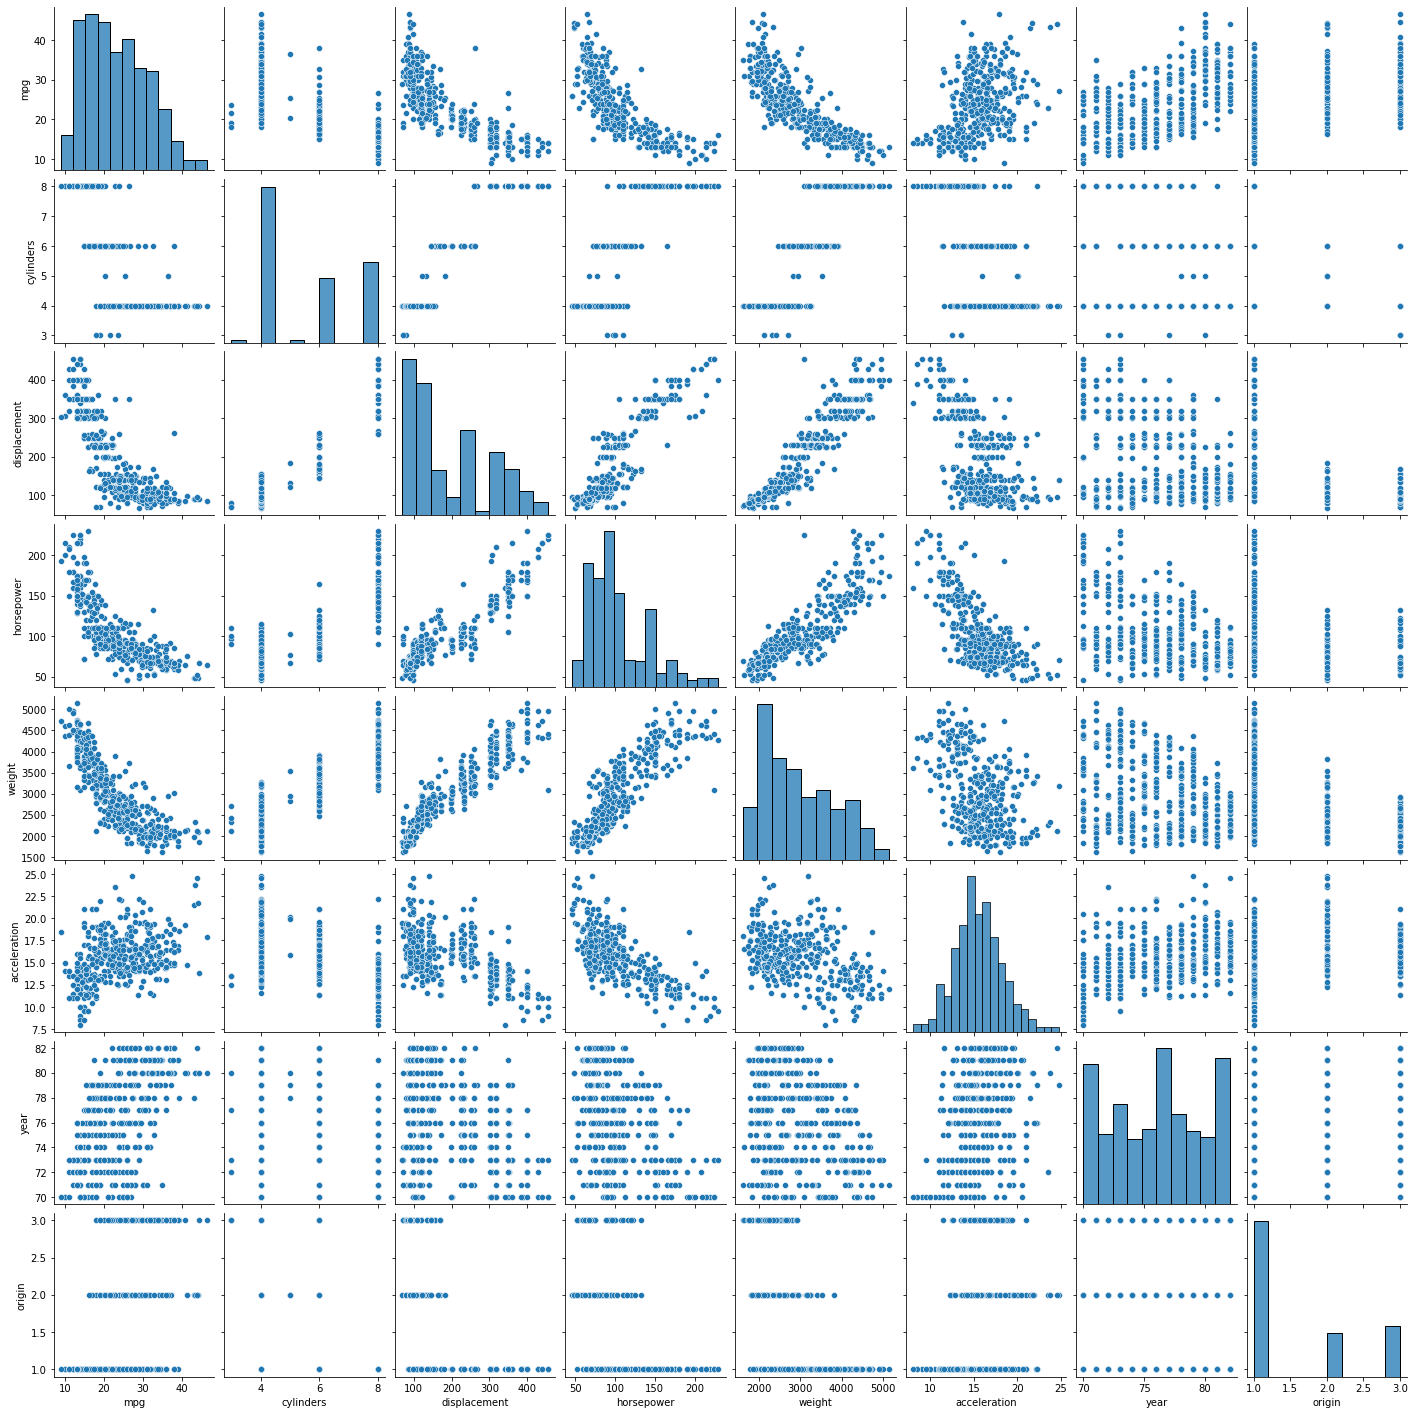

In [41]:
# Scatter plot matrix
sns.pairplot(auto1)
plt.show()

In [45]:
dat1=auto.drop(['mpg','name'],axis=1)

In [46]:
# Multiple linear regression fit

dat2=sm.add_constant(dat1)
model=sm.OLS(Y,dat2).fit()
predictions_=model.predict(dat2)
model.summary()                      
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        17:04:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

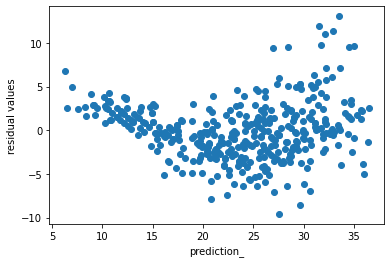

In [47]:
plt.scatter(predictions_,Y-predictions_,label="data1")
plt.xlabel('prediction_')
plt.ylabel('residual values')
plt.show()  

C:\Users\Divyesh12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

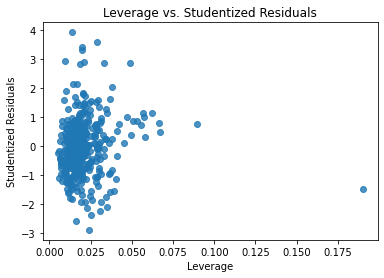

In [48]:
influencepot=model.get_influence()
student_resid = influencepot.resid_studentized_external
leverage = influencepot.hat_matrix_diag
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')


In [15]:
modelinter=smf.ols('mpg~ displacement + weight + displacement*weight',data=auto)
fitt=modelinter.fit()
print(fitt.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     343.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          7.76e-109
Time:                        16:45:07   Log-Likelihood:                -1107.1
No. Observations:                 392   AIC:                             2222.
Df Residuals:                     388   BIC:                             2238.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.7244    

In [49]:
#Variable transformation 
auto1['hp2']=auto1['horsepower']**2
auto2=auto1[['horsepower','hp2']]
dta=sm.add_constant(auto2)
model_=sm.OLS(Y,dta).fit()
print(model_.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.40e-99
Time:                        17:04:28   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

In [50]:
auto1['hplog']=np.log(auto['horsepower'])
autolog=auto1[['horsepower','hplog']]
dtalog=sm.add_constant(autolog)
modelog=sm.OLS(Y,dtalog).fit()
predictlog=modelog.predict(dta)
print(modelog.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.98e-97
Time:                        17:04:44   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.0406     12.083     12.914      0.0

In [59]:
auto3=auto1[['horsepower','hp2','hplog']]
auto3
dtacomb=sm.add_constant(auto3)
modelcomb=sm.OLS(Y,dtacomb).fit()
print(modelcomb.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     284.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.24e-97
Time:                        17:06:51   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2952     36.010      1.785      0.0

# Question 10


In [18]:

carseat=pd.read_csv("Carseats.csv")
carseat.head()
model = smf.ols('Sales ~ Price + Urban + US ',data=carseat)
model1 = model.fit()
Y=carseat['Sales']
pred=model1.predict()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        16:45:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [19]:
#p value for urban is high, hence it can be neglected

modelreduce=smf.ols('Sales~ Price + US', data=carseat)
modelred=modelreduce.fit()
predreduce=modelred.predict()
print(modelred.summary())
print(modelred.conf_int())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        16:45:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

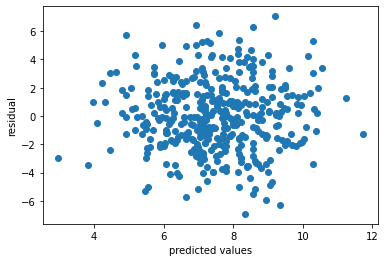

In [20]:
# diagnostic plot for model
plt.scatter(pred,Y-pred,label="data")
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.show()

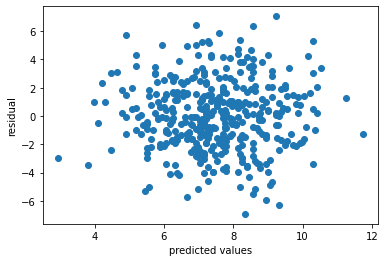

In [21]:
#diagnostic plot for reduced model
plt.scatter(predreduce,Y-predreduce,label="data")
plt.xlabel('predicted values')
plt.ylabel('residual')
plt.show()

Text(0, 0.5, 'Studentized Residuals')

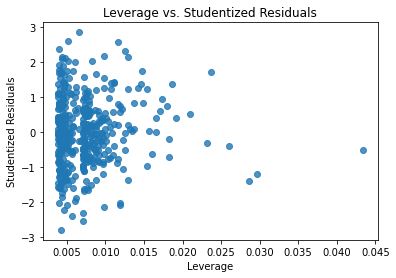

In [23]:
influencepotx=modelred.get_influence()
student_resid = influencepotx.resid_studentized_external
leverage = influencepotx.hat_matrix_diag
sns.regplot(leverage, modelred.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')


# Question 11

In [19]:
np.random.seed(1)
x=np.random.randn(100)
y=2*x +np.random.randn(100)

modelr=sm.OLS(y,x).fit()
print(modelr.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                    3.46e-36
Time:                        13:45:37   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
modelrev=sm.OLS(x,y).fit()
print(modelrev.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                    3.46e-36
Time:                        13:45:37   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
#using intercept
x1=sm.add_constant(x)
modelres=sm.OLS(y,x1).fit()
print(modelres.summary())

                  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.39e-36
Time:                        13:45:37   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.1

In [22]:
y1=sm.add_constant(y)
modelres=sm.OLS(x,y1).fit()
print(modelres.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.39e-36
Time:                        13:45:37   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.2

# Question 12


In [23]:
np.random.seed(1)
a=np.random.randn(100)
b=a+np.random.randn(100)
modelab=sm.OLS(a,b).fit()
print(modelab.params)


modelba=sm.OLS(b,a).fit()
print(modelba.params)
# Parameter values different

[0.47163548]
[1.10674169]


In [24]:
# Parameter value same

for i in range(100):
    b[i]=a[99-i]
modelab=sm.OLS(a,b).fit()
print(modelab.params)


modelba=sm.OLS(b,a).fit()
print(modelba.params)    
    

[-0.09373288]
[-0.09373288]


# Question 13

In [25]:
np.random.seed(0)
a=np.random.normal(0,1,100)
eps=np.random.normal(0,0.5,100)
Y1=-1 + 0.5*a +eps
X=sm.add_constant(a)
modelres1=sm.OLS(Y1,X)

resul=modelres1.fit()
predictr=resul.predict(X)
print(resul.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.06e-18
Time:                        13:45:37   Log-Likelihood:                -75.359
No. Observations:                 100   AIC:                             154.7
Df Residuals:                      98   BIC:                             159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9624      0.052    -18.500      0.0

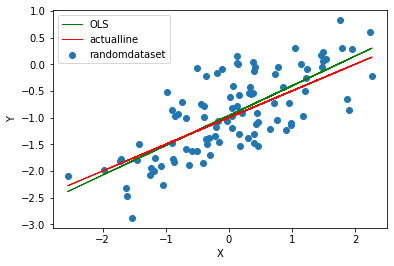

In [26]:
plt.scatter(a,Y1,label="randomdataset")
plt.plot(a,predictr,color='green',linewidth=1,label="OLS")
plt.plot(a,-1+0.5*a,color='red',linewidth=1,label="actualline")
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [27]:
#Quadratic regression
quad=x**2
quadpr=np.concatenate((X,quad.reshape(100,1)),axis=1)
modelquad=sm.OLS(Y1,quadpr)
rex=modelquad.fit()
print(rex.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     65.67
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           9.26e-19
Time:                        13:45:37   Log-Likelihood:                -71.837
No. Observations:                 100   AIC:                             149.7
Df Residuals:                      97   BIC:                             157.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0570      0.062    -17.120      0.0

In [28]:
np.random.seed(0)
a=np.random.normal(0,1,100)
eps=np.random.normal(0,0.2,100)
Y1=-1 + 0.5*a +eps
X=sm.add_constant(a)
modelres1=sm.OLS(Y1,X)

resul=modelres1.fit()
predictr=resul.predict(X)
print(resul.summary())
print(resul.conf_int())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     643.8
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.27e-45
Time:                        13:45:37   Log-Likelihood:                 16.270
No. Observations:                 100   AIC:                            -28.54
Df Residuals:                      98   BIC:                            -23.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9850      0.021    -47.334      0.0

In [29]:
np.random.seed(0)
a=np.random.normal(0,1,100)
eps=np.random.normal(0,0.7,100)
Y1=-1 + 0.5*a +eps
X=sm.add_constant(a)
modelres1=sm.OLS(Y1,X)

resul=modelres1.fit()
predictr=resul.predict(X)
print(resul.summary())
print(resul.conf_int())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     64.71
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.04e-12
Time:                        13:45:37   Log-Likelihood:                -109.01
No. Observations:                 100   AIC:                             222.0
Df Residuals:                      98   BIC:                             227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9474      0.073    -13.008      0.0

# Question 14


In [30]:
np.random.seed(1)
x1=np.random.uniform(0,1,100)
x2= 0.5*x1 +0.1*(np.random.normal(0,1,100))
y= 2+ 2*x1 + 0.3*x2 + np.random.normal(0,1,100)
df= pd.DataFrame({'x1':x1,'x2':x2},columns=['x1','x2'])
X=sm.add_constant(df[['x1','x2']])
modelr=sm.OLS(y,X)
result=modelr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        13:45:37   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

In [31]:
df.corr()

,x1,x2
x1,1.00000,0.83906
x2,0.83906,1.00000


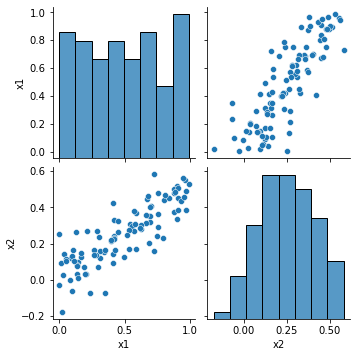

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
X1=sm.add_constant(df['x1'])
modelr=sm.OLS(y,X1)
result=modelr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           6.68e-07
Time:                        13:45:38   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

In [34]:
X2=sm.add_constant(df['x2'])
modelr=sm.OLS(y,X2)
result=modelr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.09e-07
Time:                        13:45:38   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

In [35]:
 #new datapoint addeed
x1_=np.append(x1,[0.1])
x2_=np.append(x2,[0.8])
y_=np.append(y,[6])


C:\Users\Divyesh12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

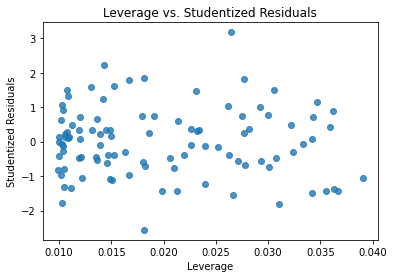

In [36]:
X1_=sm.add_constant(x1_)
modelr=sm.OLS(y_,X1_)
resultx1=modelr.fit()

influencepotx1=resultx1.get_influence()
student_resid = influencepotx1.resid_studentized_external
leverage = influencepotx1.hat_matrix_diag
sns.regplot(leverage, resultx1.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

Text(0, 0.5, 'Studentized Residuals')

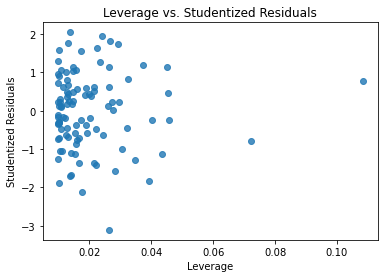

In [37]:
X2_=sm.add_constant(x2_)
modelr=sm.OLS(y_,X2_)
resultx2=modelr.fit()


influencepotx2=resultx2.get_influence()
student_resid = influencepotx2.resid_studentized_external
leverage = influencepotx2.hat_matrix_diag
sns.regplot(leverage, resultx2.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

Text(0, 0.5, 'Studentized Residuals')

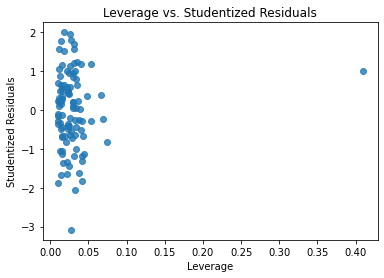

In [38]:
df_= pd.DataFrame({'x1':x1_,'x2':x2_},columns=['x1','x2'])
X_=sm.add_constant(df_[['x1','x2']])
modelr=sm.OLS(y_,X_)
resultcom=modelr.fit()

influencepotcom=resultcom.get_influence()
student_resid = influencepotcom.resid_studentized_external
leverage = influencepotcom.hat_matrix_diag
sns.regplot(leverage, resultcom.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

# Question 15

In [39]:
Boston =pd.read_csv("Boston.csv")
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
df1=Boston.drop('crim',axis=1)
Y=Boston['crim']
X_=np.zeros(13)
for i in range(1,14):
    x=df1.iloc[:,i]
    X=sm.add_constant(x)
    modl=sm.OLS(Y,X).fit()
    l=df1.columns.values.tolist()
    
    print(modl.params)
    X_[i-1]=modl.params[1]
    print(modl.pvalues[1])
    print()    

const    4.453694
zn      -0.073935
dtype: float64
5.506472107679307e-06

const   -2.063743
indus    0.509776
dtype: float64
1.4503489330272292e-21

const    3.744447
chas    -1.892777
dtype: float64
0.2094345015352004

const   -13.719882
nox      31.248531
dtype: float64
3.751739260356816e-23

const    20.481804
rm       -2.684051
dtype: float64
6.346702984687839e-07

const   -3.777906
age      0.107786
dtype: float64
2.8548693502441573e-16

const    9.499262
dis     -1.550902
dtype: float64
8.519948766926326e-19

const   -2.287159
rad      0.617911
dtype: float64
2.6938443981864414e-56

const   -8.528369
tax      0.029742
dtype: float64
2.357126835257048e-47

const     -17.646933
ptratio     1.151983
dtype: float64
2.94292244735987e-11

const    16.553529
black    -0.036280
dtype: float64
2.487273973773806e-19

const   -3.330538
lstat    0.548805
dtype: float64
2.6542772314731968e-27

const    11.796536
medv     -0.363160
dtype: float64
1.1739870821943694e-19



In [41]:
# For chas dataset the p-value obtained is 0.2, which is high

# Multiple regression
# ignore unknown row
df1
df2= df1.drop([df1.columns[0]],axis=1)
df_2=sm.add_constant(df2)
modmul=sm.OLS(Y,df_2).fit()
print(modmul.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        13:45:39   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

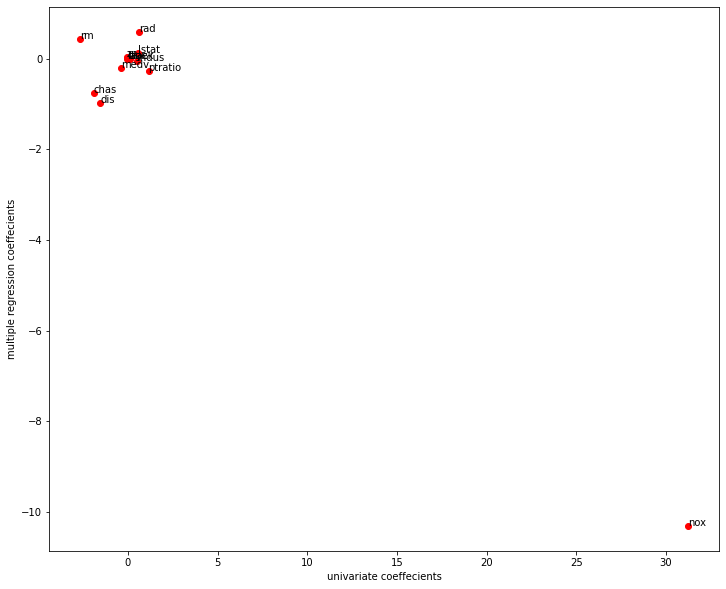

In [42]:

Y_=modmul.params[1:]
plt.figure(figsize=(12,10))
for i in range(13):
    plt.plot(X_[i],Y_[i],'ro')
    plt.text(X_[i],Y_[i],l[i+1])
plt.xlabel('univariate coeffecients')
plt.ylabel('multiple regression coeffecients')
plt.show()

In [43]:
# Cubic regression
for i in range(1,14):
    x=df1.iloc[:,i]
    quad=x**2
    cube=x**3
    df3=pd.concat([x,quad,cube],axis=1)
    df3.columns=[df1.columns.values[i],'quad','cube']
    X=sm.add_constant(df3)
    modle=sm.OLS(Y,X).fit()    
    print(modle.params)
    print(modle.summary())
    
    print()    


const    4.846050
zn      -0.332188
quad     0.006483
cube    -0.000038
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        13:45:39   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [30]:
auto3


,horsepower,hp2,hplog
0,130.0,16900.0,4.867534
1,165.0,27225.0,5.105945
2,150.0,22500.0,5.010635
3,150.0,22500.0,5.010635
4,140.0,19600.0,4.941642
...,...,...,...
392,86.0,7396.0,4.454347
393,52.0,2704.0,3.951244
394,84.0,7056.0,4.430817
395,79.0,6241.0,4.369448


In [51]:
auto3
dtacomb=sm.add_constant(auto3)